In [1]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

GetDist Version: 1.1.2, Matplotlib version: 3.3.2


In [2]:
data_path = '/home/zcapjru/PhD/Error_Margin/Monte_Python_runs/1COSMO/'

In [3]:
labels = [ '\omega_{cdm}', '\omega_b', 'h', 'w_0', 'w_a']
names =  [ 'omega_cdm', 'omega_b', 'h', 'w0_fld', 'wa_fld' ]

fz_names = ['f_z0.00', 'f_z0.15', 'f_z0.30', 'f_z0.45', 'f_z0.60',
            'f_z0.75', 'f_z0.90', 'f_z1.05', 'f_z1.20', 'f_z1.35', 
            'f_z1.50', 'f_z1.65', 'f_z1.80', 'f_z1.95', 'f_z2.10',
            'f_z2.25', 'f_z2.40', 'f_z2.55', 'f_z2.70', 'f_z2.85']
fz_labels =['f_{z0.00}', 'f_{z0.15}', 'f_{z0.30}', 'f_{z0.45}', 'f_{z0.60}', 
            'f_{z0.75}', 'f_{z0.90}', 'f_{z1.05}', 'f_{z1.20}', 'f_{z1.35}',
            'f_{z1.50}', 'f_{z1.65}', 'f_{z1.80}', 'f_{z1.95}', 'f_{z2.10}', 
            'f_{z2.25}', 'f_{z2.40}', 'f_{z2.55}', 'f_{z2.70}', 'f_{z2.85}']

In [4]:
def munch_chain_f(chain_path, names, labels):
    path = os.path.join(data_path + chain_path)
    chain = np.loadtxt(path)
    cols = np.transpose(chain)
    loglikes = cols[1]
    weights = cols[0]
    params = np.transpose(cols[2:(2+len(names))])
    fz_cols = cols[-(len(fz_names)):]
    fz_params = np.transpose(fz_cols)
    fz_means = np.array([])
    fz_sigmas = np.array([])
    for col in fz_cols:
        mean = np.mean(col)
        sigma = np.std(col)
        fz_means = np.append(fz_means, mean)
        fz_sigmas = np.append(fz_sigmas, sigma)
        
    #param_samples = MCSamples(samples=params, names=names, labels=labels,
    #          weights=weights, loglikes=loglikes)
    #fz_samples = MCSamples(samples=fz_params, names=fz_names, labels=fz_labels,
    #          weights=weights, loglikes=loglikes)
    
    return params, fz_means, fz_sigmas, fz_cols
    

In [5]:
BOSS, fz_BOSS_m, fz_BOSS_s, fz_cols_BOSS = munch_chain_f('BOSSDR12_f_mod/2021-02-15_100000000__1.txt', names, labels)
DESI, fz_DESI_m, fz_DESI_s, fz_cols_DESI = munch_chain_f('DESI_dA_f_mod/2021-02-15_100000000__1.txt', names, labels)
Pan, fz_Pan_m, fz_Pan_s, fz_cols_Pan = munch_chain_f('Pantheon_f/2021-02-16_100000000__1.txt', names, labels)
eBOSS, fz_eBOSS_m, fz_eBOSS_s, fz_cols_eBOSS = munch_chain_f('eBOSSDR16_f/2021-02-22_100000000__1.txt', names, labels)
WFIRST, fz_WFIRST_m, fz_WFIRST_s, fz_cols_WFIRST = munch_chain_f('WFIRST_f/2021-02-18_100000000__1.txt', names, labels)

In [6]:
#g = plots.getSubplotPlotter()
#g.settings.axes_fontsize = 25
#g.settings.legend_fontsize = 25
#g.settings.axes_labelsize = 25
#g.triangle_plot([BOSS_f, eBOSS_f, DESI_f], legend_labels=['BOSS', 'eBOSS',  'DESI'],
#                filled=True)

In [7]:
#g = plots.getSubplotPlotter()
#g.settings.axes_fontsize = 25
#g.settings.legend_fontsize = 25
#g.settings.axes_labelsize = 25
#g.triangle_plot([Pan_f, WFIRST_f], legend_labels=['Pantheon', 'WFIRST'],
#                filled=True)

In [8]:
def munch_fz(name):
    path = os.path.join(data_path, name, name)
    cov = np.loadtxt(path + '.covmat')
    best = np.loadtxt(path + '.bestfit')[(len(names)):]
    err = np.array([])
    for i in np.arange(len(cov)):
        sig = np.sqrt(cov[i,i])
        err = np.append(err, sig)
    err = err[(len(names)):]
    fz_h = best + err
    fz_l = best - err
    z_arr = np.arange(0, 3, 0.15)
    output = {'z_arr': z_arr,
             'f_z': best,
             'f_z_h': fz_h,
             'f_z_l': fz_l,
             'err': err}
    return output
    

In [9]:
BOSS_fz_mod = munch_fz('BOSSDR12_f_mod')
DESI_fz_mod = munch_fz('DESI_dA_f_mod')
eBOSS_fz = munch_fz('eBOSSDR14_f')
Pan_fz = munch_fz('Pantheon_f')
WFIRST_fz = munch_fz('WFIRST_f')

In [10]:
z_arr = np.array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
       1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85])

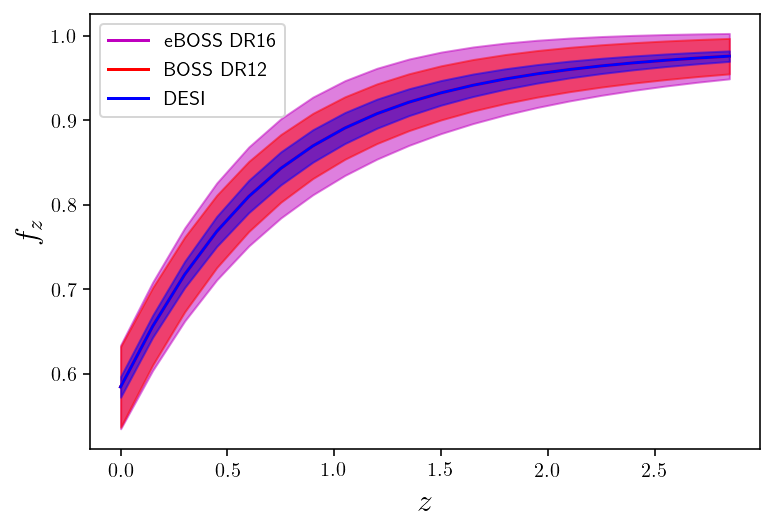

In [11]:
plt.plot(z_arr,  fz_BOSS_m, color ='m', label='eBOSS DR16')
plt.fill_between(eBOSS_fz['z_arr'],  fz_BOSS_m + fz_eBOSS_s,  fz_BOSS_m - fz_eBOSS_s,color='m',alpha=.5)

plt.plot(z_arr, fz_BOSS_m, color='r', label='BOSS DR12')
plt.fill_between(BOSS_fz_mod['z_arr'], fz_BOSS_m + fz_BOSS_s, fz_BOSS_m - fz_BOSS_s, color='r', alpha=.5)

plt.plot(z_arr,  fz_BOSS_m, color ='b', label='DESI')
plt.fill_between(DESI_fz_mod['z_arr'],  fz_BOSS_m + fz_DESI_s,  fz_BOSS_m - fz_DESI_s,color='b',alpha=.5)

plt.xlabel('$z$', fontsize=16)
plt.ylabel('$f_z$', fontsize=16)
plt.legend()
plt.show()

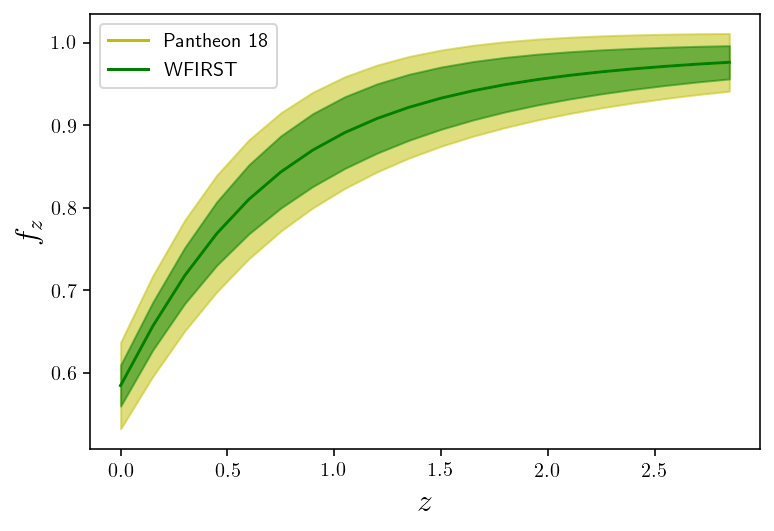

In [12]:
plt.plot(z_arr,  fz_BOSS_m, color ='y', label='Pantheon 18')
plt.fill_between(z_arr,  fz_BOSS_m + fz_Pan_s,  fz_BOSS_m - fz_Pan_s,color='y',alpha=.5)

plt.plot(z_arr,  fz_BOSS_m, color ='g', label='WFIRST')
plt.fill_between(z_arr,  fz_BOSS_m + fz_WFIRST_s,  fz_BOSS_m - fz_WFIRST_s,color='g',alpha=.5)

plt.xlabel('$z$', fontsize=16)
plt.ylabel('$f_z$', fontsize=16)
plt.legend()
plt.show()

# Constrain E

In [13]:
import pyccl as ccl
from scipy.interpolate import interp1d

In [14]:
a_arr = 1/(1+z_arr) 
x_arr = np.log(a_arr)
x_midarr = (x_arr[1:]+x_arr[:-1])/2
n= 100

In [15]:
# This is rather complicated let's not do it for now

# interpolators = np.array([])
# for row in fz_row:
#    fz_midarr = interp1d(x_midarr, row, kind='cubic')(z_midarr)
#    interpolators = np.append(interplators, fz_midarr )

In [16]:
def get_Omega_m_cols(params_rows, z_arr):
    Omega_m_rows = []
    for row in params_rows:
        params_dict = {'Omega_cdm': row[0], 
                       'Omega_b': row[1],
                       'h': row[2]}  
        classy = ccl.boltzmann.classy.Class()
        classy.set(params_dict)
        classy.compute()
        Omega_m_arr = []
        for z in z_arr:
            Omega_m = classy.Om_m(z)
            Omega_m_arr.append(Omega_m) 
        Omega_m_rows.append(Omega_m_arr)
        
    Omega_m_cols = np.transpose(np.array(Omega_m_rows))
    return Omega_m_cols

def get_Omega_m_cols_w(params_rows, z_arr):
    Omega_m_rows = []
    for row in params_rows:
        params_dict = {'Omega_cdm': row[0], 
                       'Omega_b': row[1],
                       'h': row[2], 
                       'Omega_Lambda': 0,
                       'w0_fld': row[3],
                       'wa_fld': row[4]} 
        classy = ccl.boltzmann.classy.Class()
        classy.set(params_dict)
        classy.compute()
        Omega_m_arr = []
        for z in z_arr:
            Omega_m = classy.Om_m(z)
            Omega_m_arr.append(Omega_m) 
        Omega_m_rows.append(Omega_m_arr)
        
    Omega_m_cols = np.transpose(np.array(Omega_m_rows))
    return Omega_m_cols

In [17]:
z_midarr = (z_arr[1:]+z_arr[:-1])/2
Omega_m_cols = get_Omega_m_cols(DESI[:n], z_midarr)
Omega_m_cols_w = get_Omega_m_cols_w(DESI[:n], z_midarr)

In [18]:
Omega_m_m = np.array([])
for col in Omega_m_cols:
    mean = np.mean(col)
    Omega_m_m = np.append(Omega_m_m, mean)
    
Omega_m_m_w = np.array([])
for col in Omega_m_cols_w:
    mean = np.mean(col)
    Omega_m_m_w = np.append(Omega_m_m_w, mean)

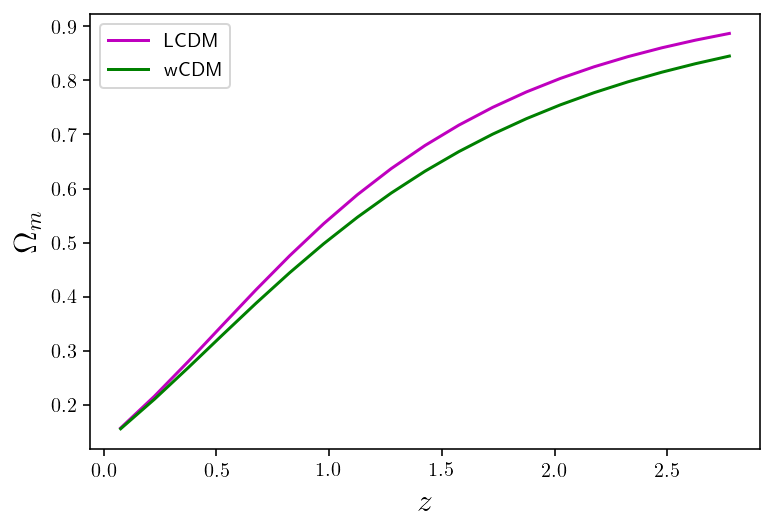

In [19]:
plt.plot(z_midarr,  Omega_m_m, color ='m', label='LCDM')
plt.plot(z_midarr,  Omega_m_m_w, color ='g', label='wCDM')
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$\Omega_m$', fontsize=16)
plt.legend()
plt.show()

In [20]:
def get_fz_diff_cols(fz_cols):
    fz_rows = np.transpose(fz_cols)
    fz_diff_rows = []
    for row in fz_rows:
        fz_diff_row = (row[1:]-row[:-1])/(x_arr[1:]-x_arr[:-1])
        fz_diff_rows.append(fz_diff_row)
    fz_diff_cols = np.transpose(np.array(fz_diff_rows))
    return fz_diff_cols

In [21]:
fz_cols = np.transpose(np.transpose(fz_cols_DESI)[:n])

In [22]:
fz_diff_cols = get_fz_diff_cols(fz_cols)

In [23]:
fz_m = np.array([])
for col in fz_cols:
    mean = np.mean(col)
    fz_m = np.append(fz_m, mean)
    
fz_diff_m = np.array([])
for col in fz_diff_cols:
    mean = np.mean(col)
    fz_diff_m = np.append(fz_diff_m, mean)

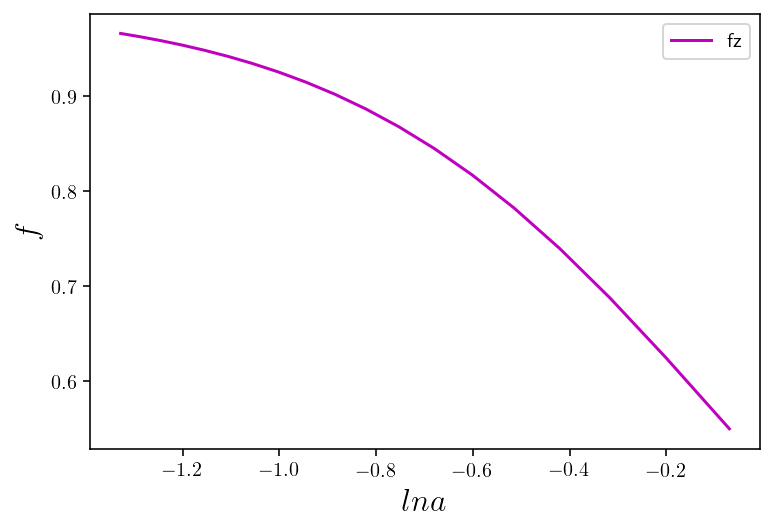

In [24]:
plt.plot(x_midarr,  (fz_m[1:]+fz_m[:-1])/2, color ='m', label='fz')
plt.xlabel('$lna$', fontsize=16)
plt.ylabel('$f$', fontsize=16)
plt.legend()
plt.show()

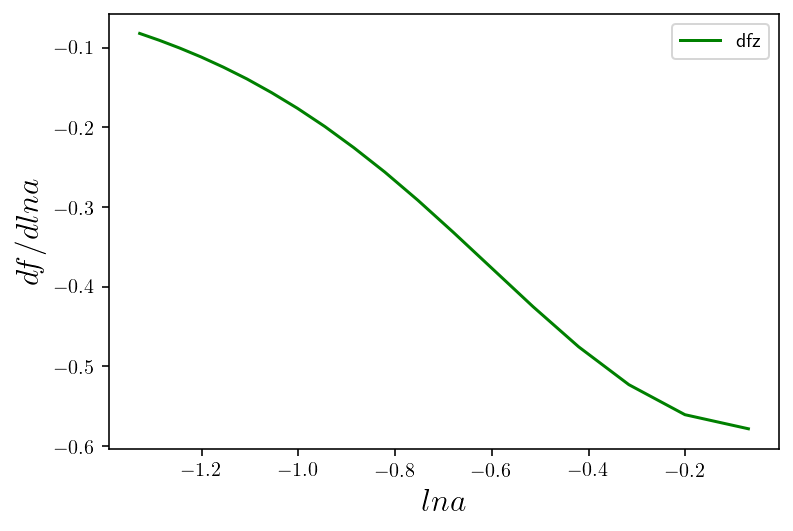

In [25]:
plt.plot(x_midarr,  fz_diff_m, color ='g', label='dfz')
plt.xlabel('$lna$', fontsize=16)
plt.ylabel('$df/dlna$', fontsize=16)
plt.legend()
plt.show()

In [26]:
def get_q_cols(param_rows, z_arr, Omega_m_cols):
    w_rows = []
    for row in param_rows:
        w_row = row[3]+row[4]*(z_arr/(1+z_arr))
        w_rows.append(w_row)
    w_cols = np.transpose(np.array(w_rows))
    q_cols = 0.5*(1-3*w_cols*(1-Omega_m_cols))
    return q_cols

In [27]:
q_cols = get_q_cols(DESI[:n], z_midarr, Omega_m_cols)

In [28]:
def get_Ez_cols(fz_cols, fz_diff_cols, Omega_m_cols, q_cols = None):
    fz_cols = (fz_cols[1:]+fz_cols[:-1])/2
    if q_cols is None:
        q_cols = 0.5*(4-3*Omega_m_cols)
    Ez_cols = fz_diff_cols+q_cols*fz_cols+fz_cols**2
    Ez_cols *= 2/(3*Omega_m_cols)
    return Ez_cols

In [29]:
Ez_cols = get_Ez_cols(fz_cols, fz_diff_cols, Omega_m_cols, q_cols=None)
Ez_cols_w = get_Ez_cols(fz_cols, fz_diff_cols, Omega_m_cols_w, q_cols=q_cols)

In [30]:
Ez_m = np.array([])
Ez_s = np.array([])
for col in Ez_cols:
    mean = np.mean(col)
    sigma = np.std(col)
    Ez_m = np.append(Ez_m, mean)
    Ez_s = np.append(Ez_s, sigma)

In [31]:
Ez_m_w = np.array([])
Ez_s_w = np.array([])
for col in Ez_cols_w:
    mean = np.mean(col)
    sigma = np.std(col)
    Ez_m_w = np.append(Ez_m_w, mean)
    Ez_s_w = np.append(Ez_s_w, sigma)

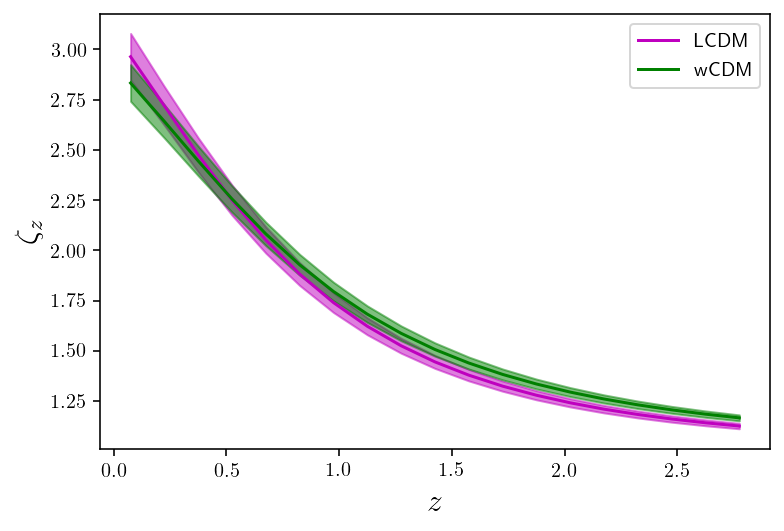

In [32]:
plt.plot(z_midarr,  Ez_m, color ='m', label='LCDM')
plt.fill_between(z_midarr,   Ez_m+Ez_s, Ez_m-Ez_s, color='m',alpha=.5)
plt.plot(z_midarr,  Ez_m_w, color ='g', label='wCDM')
plt.fill_between(z_midarr,   Ez_m_w+Ez_s_w, Ez_m_w-Ez_s_w, color='g',alpha=.5)
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$\zeta_z$', fontsize=16)
plt.legend()
plt.show()

# Different Approach

In [156]:
data_path = '/home/zcapjru/PhD/Error_Margin/Monte_Python_runs/1COSMO/'
z_arr = np.linspace(0, 40, 400)
a_arr = 1/(1+z_arr) 
x_arr = np.log(a_arr)
x_midarr = (x_arr[1:]+x_arr[:-1])/2
z_midarr = (z_arr[1:]+z_arr[:-1])/2

def make_Ez(chain_path, f, b, Emilio=False):
    path = os.path.join(data_path + chain_path)
    chain = np.loadtxt(path)
    cols = np.transpose(chain)
    params_cols = cols[2:7]
    fz_cols = cols[-20:]
    params_rows = np.transpose(params_cols)
    fz_rows = np.transpose(fz_cols)
    n_rows = 100 #len(params_rows)
    Ez_rows = []
    for i in np.arange(n_rows):
        params_arr = params_rows[i] 
        params_LCDM = {'omega_cdm': params_arr[0], 
                       'omega_b': params_arr[1],
                       'h': params_arr[2]} 
        classy_LCDM = ccl.boltzmann.classy.Class()
        classy_LCDM.set(params_LCDM)
        classy_LCDM.compute()
        
        params_wCDM = {'omega_cdm': params_arr[0], 
                       'omega_b': params_arr[1],
                       'h': params_arr[2],
                       'Omega_Lambda': 0,
                       'w0_fld': params_arr[3],
                       'wa_fld': params_arr[4]}
        classy_wCDM = ccl.boltzmann.classy.Class()
        classy_wCDM.set(params_wCDM)
        classy_wCDM.compute()
        
        if f == 'LCDM':
            cosmo_f = classy_LCDM
        else:
            cosmo_f = classy_wCDM
            
        if b == 'LCDM':
            cosmo_b = classy_LCDM
        else:
            cosmo_b = classy_wCDM
        
        if Emilio == False:
            fz_arr = np.array([])   
            for z in z_arr:
                fz = cosmo_f.scale_independent_growth_factor_f(z)
                fz_arr = np.append(fz_arr, fz)
        else:
            fz_arr = fz_rows[i] 
            
        
        Omega_m_arr = np.array([])
        for z in z_midarr:
            Omega_m = cosmo_b.Om_m(z)
            Omega_m_arr = np.append(Omega_m_arr, Omega_m)
        
        fz_diff_arr = (fz_arr[1:]-fz_arr[:-1])/(x_arr[1:]-x_arr[:-1])
        fz_midarr = (fz_arr[1:]+fz_arr[:-1])/2
        
        if b == 'LCDM':
            q_arr = 0.5*(4-3*Omega_m_arr)
        else:
            w_arr = params_arr[3]+params_arr[4]*(z_midarr/(1+z_midarr))
            q_arr = 0.5*(1-3*w_arr*(1-Omega_m_arr)) 
        
        Ez_arr = fz_diff_arr+q_arr*fz_midarr+fz_midarr**2
        Ez_arr *= 2/(3*Omega_m_arr)
        
        Ez_rows.append(Ez_arr)
        
    return np.array(Ez_rows)

In [163]:
data_path = '/home/zcapjru/PhD/Error_Margin/Monte_Python_runs/1COSMO/'
z_arr = np.linspace(0, 2.85, 20)
a_arr = 1/(1+z_arr) 
x_arr = np.log(a_arr)
x_midarr = (x_arr[1:]+x_arr[:-1])/2
z_midarr = (z_arr[1:]+z_arr[:-1])/2

def make_Ez_q(chain_path, f, b, Emilio=False):
    path = os.path.join(data_path + chain_path)
    chain = np.loadtxt(path)
    cols = np.transpose(chain)
    params_cols = cols[2:7]
    fz_cols = cols[-20:]
    params_rows = np.transpose(params_cols)
    fz_rows = np.transpose(fz_cols)
    n_rows = 100 #len(params_rows)
    Ez_rows = []
    for i in np.arange(n_rows):
        params_arr = params_rows[i] 
        params_LCDM = {'omega_cdm': params_arr[0], 
                       'omega_b': params_arr[1],
                       'h': params_arr[2]} 
        classy_LCDM = ccl.boltzmann.classy.Class()
        classy_LCDM.set(params_LCDM)
        classy_LCDM.compute()
        
        params_wCDM = {'omega_cdm': params_arr[0], 
                       'omega_b': params_arr[1],
                       'h': params_arr[2],
                       'Omega_Lambda': 0,
                       'w0_fld': params_arr[3],
                       'wa_fld': params_arr[4]}
        classy_wCDM = ccl.boltzmann.classy.Class()
        classy_wCDM.set(params_wCDM)
        classy_wCDM.compute()
        
        if f == 'LCDM':
            cosmo_f = classy_LCDM
        else:
            cosmo_f = classy_wCDM
            
        if b == 'LCDM':
            cosmo_b = classy_LCDM
        else:
            cosmo_b = classy_wCDM
        
        if Emilio == False:
            fz_arr = np.array([])   
            for z in z_arr:
                fz = cosmo_f.scale_independent_growth_factor_f(z)
                fz_arr = np.append(fz_arr, fz)
        else:
            fz_arr = fz_rows[i] 
            
        
        Omega_m_arr = np.array([])
        for z in z_midarr:
            Omega_m = cosmo_b.Om_m(z)
            Omega_m_arr = np.append(Omega_m_arr, Omega_m)
        
        fz_diff_arr = (fz_arr[1:]-fz_arr[:-1])/(x_arr[1:]-x_arr[:-1])
        fz_midarr = (fz_arr[1:]+fz_arr[:-1])/2
        
        com_H_arr = np.array([])
        for z in z_arr:
            com_H = (1/(1+z))*cosmo_b.Hubble(z)
            com_H_arr = np.append(com_H_arr, com_H)
        
        com_H_diff_arr = (com_H_arr[1:]-com_H_arr[:-1])/(x_arr[1:]-x_arr[:-1])
        com_H_midarr = (com_H_arr[1:]+com_H_arr[:-1])/2
        
        q_arr = 1 + (com_H_diff_arr/com_H_midarr)
        
        Ez_arr = fz_diff_arr+q_arr*fz_midarr+fz_midarr**2
        Ez_arr *= 2/(3*Omega_m_arr)
        
        Ez_rows.append(Ez_arr)
        
    return np.array(Ez_rows)

In [164]:
Ez_wCDM_wCDM = make_Ez_q('DESI_dA_f_mod/2021-02-15_100000000__1.txt', f='wCDM', b='wCDM')
Ez_wCDM_LCDM = make_Ez_q('DESI_dA_f_mod/2021-02-15_100000000__1.txt', f='wCDM', b='LCDM')
#Ez_wCDM_wCDM_e = make_Ez_q('DESI_dA_f_mod/2021-02-15_100000000__1.txt', f='wCDM', b='wCDM', Emilio=True)
#Ez_wCDM_LCDM_e = make_Ez_q('DESI_dA_f_mod/2021-02-15_100000000__1.txt', f='wCDM', b='LCDM', Emilio=True)
Ez_LCDM_LCDM = make_Ez_q('DESI_dA_f_mod/2021-02-15_100000000__1.txt', f='LCDM', b='LCDM')
Ez_LCDM_wCDM = make_Ez_q('DESI_dA_f_mod/2021-02-15_100000000__1.txt', f='LCDM', b='wCDM')

In [165]:
def get_m_s(rows):
    cols = np.transpose(rows)
    means = np.array([])
    sigmas = np.array([])
    for col in cols:
        mean = np.mean(col)
        sigma = np.std(col)
        means = np.append(means, mean)
        sigmas = np.append(sigmas, sigma)
    return means, sigmas

In [166]:
Ez_m_ww, Ez_s_ww = get_m_s(Ez_wCDM_wCDM)
Ez_m_wl, Ez_s_wl = get_m_s(Ez_wCDM_LCDM)
Ez_m_ww_e, Ez_s_ww_e = get_m_s(Ez_wCDM_wCDM_e)
Ez_m_wl_e, Ez_s_wl_e = get_m_s(Ez_wCDM_LCDM_e)
Ez_m_ll, Ez_s_ll = get_m_s(Ez_LCDM_LCDM)
Ez_m_lw, Ez_s_lw = get_m_s(Ez_LCDM_wCDM)

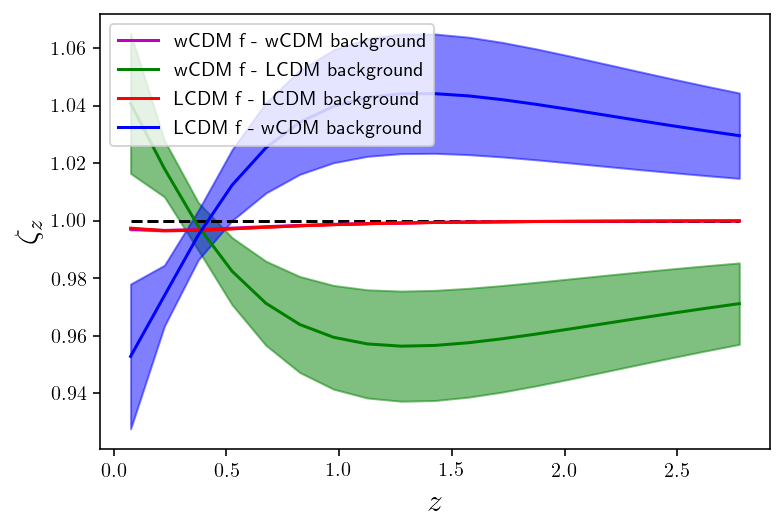

In [167]:
plt.plot(z_midarr,  np.ones(len(Ez_m_ww)), 'k--')
plt.plot(z_midarr,  Ez_m_ww, color ='m', label='wCDM f - wCDM background')
plt.fill_between(z_midarr,   Ez_m_ww+Ez_s_ww, Ez_m_ww-Ez_s_ww, color='m',alpha=.5)
plt.plot(z_midarr,  Ez_m_wl, color ='g', label='wCDM f - LCDM background')
plt.fill_between(z_midarr,   Ez_m_wl+Ez_s_wl, Ez_m_wl-Ez_s_wl, color='g',alpha=.5)
plt.plot(z_midarr,  Ez_m_ll, color ='r', label='LCDM f - LCDM background')
plt.fill_between(z_midarr,   Ez_m_ll+Ez_s_ll, Ez_m_ll-Ez_s_ll, color='r',alpha=.5)
plt.plot(z_midarr,  Ez_m_lw, color ='b', label='LCDM f - wCDM background')
plt.fill_between(z_midarr,   Ez_m_lw+Ez_s_lw, Ez_m_lw-Ez_s_lw, color='b',alpha=.5)
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$\zeta_z$', fontsize=16)
plt.legend()
plt.show()

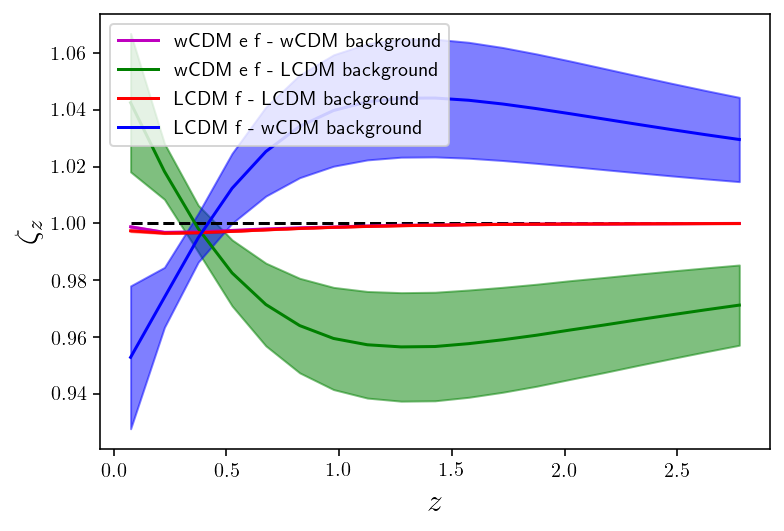

In [168]:
plt.plot(z_midarr,  np.ones(len(Ez_m_ww)), 'k--')
plt.plot(z_midarr,  Ez_m_ww_e, color ='m', label='wCDM e f - wCDM background')
plt.fill_between(z_midarr,   Ez_m_ww_e+Ez_s_ww_e, Ez_m_ww_e-Ez_s_ww_e, color='m',alpha=.5)
plt.plot(z_midarr,  Ez_m_wl_e, color ='g', label='wCDM e f - LCDM background')
plt.fill_between(z_midarr,   Ez_m_wl_e+Ez_s_wl_e, Ez_m_wl_e-Ez_s_wl_e, color='g',alpha=.5)
plt.plot(z_midarr,  Ez_m_ll, color ='r', label='LCDM f - LCDM background')
plt.fill_between(z_midarr,   Ez_m_ll+Ez_s_ll, Ez_m_ll-Ez_s_ll, color='r',alpha=.5)
plt.plot(z_midarr,  Ez_m_lw, color ='b', label='LCDM f - wCDM background')
plt.fill_between(z_midarr,   Ez_m_lw+Ez_s_lw, Ez_m_lw-Ez_s_lw, color='b',alpha=.5)
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$\zeta_z$', fontsize=16)
plt.legend()
plt.show()